# Module 4 Data analysis with python

## Alumno: Luis Jose Navarrete Baduy
## Matricula: A01793919
## Profesora: María de la Paz Rico Fernández

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### Simple Linear Regression and Multiple LR

La regresion lineal simple nos permite realizar la prediccion entre la variable independiente (X) y la variable dependiente (Y) la variable X trata de encontrar el coeficiente y la pendiente para minimizar el error entre la prediccion y el valor actual Y.



In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

Se declara el modelo a utilizar y las variable independiente y dependiente con lo que se va a entrenar el modelo

In [4]:
lm = LinearRegression()
X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X, Y)

LinearRegression()

Permite realizar la prediccion usando el modelo entrenado

In [5]:
yhat = lm.predict(X)

Imprime la pendiente o el parametro b0 y los coeficientes en este caso es b1

In [6]:
lm.intercept_, lm.coef_

(array([38423.30585816]), array([[-821.73337832]]))

### Multiple Linear Regression

In [7]:
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df[['price']]
lm.fit(Z, Y)

LinearRegression()

In [8]:
yhat = lm.predict(Z)

In [9]:
lm.intercept_, lm.coef_

(array([-15806.62462633]),
 array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]]))

### Regression plot

Nos muestra el error entre la linea establecida por los parametros obtenidos y el valor real, de esta manera podemos ver el error que tiene el modelo de manera visual.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

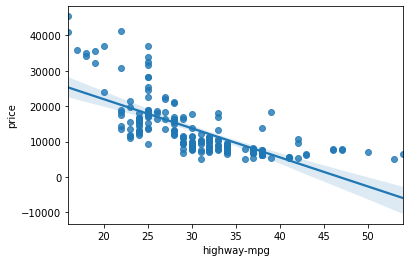

In [10]:
sns.regplot(x='highway-mpg', y='price', data=df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

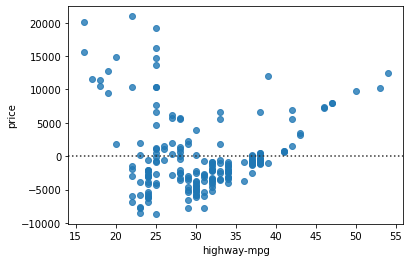

In [11]:
sns.residplot(x='highway-mpg', y='price', data=df)

/Users/luisbaduy97/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/luisbaduy97/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


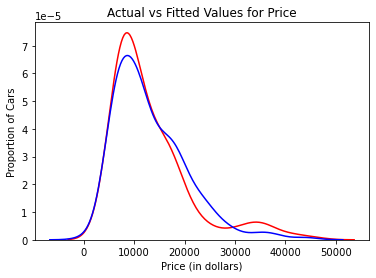

In [12]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [13]:
# TRANSFORMANDO LOS DATOS
SCALE=StandardScaler()
SCALE.fit(df[["horsepower","highway-mpg"]])

x_scale=SCALE.transform(df[["horsepower","highway-mpg"]])

In [14]:
#DECLARANDO LOS STEPS DEL PIPELINE
Input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(degree=2)),("model",LinearRegression())]

In [15]:
# INICIANDO EL PIPELINE
pipe=Pipeline(Input)

In [17]:
# PASANDO LAS VARIABLES A TRANSOFORMAR Y LA VARIABLE A PREDECIR
pipe.fit(X,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [19]:
# REALIZAR PREDICCIONES CON LOS VALORES DE ENTRADA
# YA DEBE ESTAR ENTRENADO EL MODELO
yhat=pipe.predict(X)

### Measures for in sample evaluation

La metrica mas comun para medir el error es el Mean Squared Error que suma las diferencias entre el valor real y la prediccion y la eleva al cuadrado, esta se suma entre todas las muestras y se divide por la cantidad de muestras utilizadas.

El coeficiente de determinación o R cuadrada ($R^2$)
Es la medida para determinar que tan cerca están los datos ajustados de la regresión lineal.
$R^2$ : el porcentaje de variación de la variable objetivo (Y) que es explicada por el modelo lineal.

In [20]:
x=df[["highway-mpg"]] #predictor
y=df["price"] #target

lm.fit(x,y)
lm.score(x,y)

0.4965911884339176

### Prediccion y toma de decisiones

In [21]:
lm.fit(df[["highway-mpg"]],df[["price"]])
lm.predict(np.array(30).reshape(1,-1))

array([[13771.3045085]])

El precio de un auto de 30 millas por galón es de 13771

También se pueden ver los coeficientes

In [22]:
lm.coef_

array([[-821.73337832]])

También podemos ver si la predicción es realista o no, porque puede pasar que al momento de entrenar al algoritmo no existan autos de ese rango en el conjunto de entrenamiento.

In [25]:
x_input=np.arange(1,101,1).reshape(-1,1)
yhat=lm.predict(x_input)
yhat[:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

### Calificación del modulo

<img src="assets/MODULE_4_GRADE.png" alt="evidencia" />